In [1]:
from google.colab import files
uploaded = files.upload()

Saving content.csv to content.csv


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
import tensorflow.keras.utils as ku
import numpy as np

In [6]:
data = open('/content/content.csv').read()

In [7]:
data

'"Sen gülünce güller açar gülpembe"\n"Bülbüller seni söyler biz dinlerdik gülpembe"\n"Sen gelince bahar gelir gülpembe"\n"Dereler seni çağlar sevinirdik gülpembe"\n""\n"Güz yağmurlarıyla bir gün göçtün gittin sen inanamadık gülpembe"\n"Bizim iller sessiz bizim iller sensiz olamadı gülpembe"\n"Dudağımda son bir türkü gülpembe"\n"Hala hep seni söyler seni çağırır gülpembe"\n""\n"Güz yağmurlarıyla bir gün göçtün gittin inanamadık gülpembe"\n"Bizim iller sessiz bizim iller sensiz olamadı gülpembe"\n"Gözlerimde son bir bulut gülpembe"\n"Hala hep seni arar seni bekler gülpembe"\n""\n"Dudağımda son bir türkü gülpembe"\n"Hala hep seni söyler seni çağırır gülpembe"\n""\n"Hey hey Günaydın çocuklar günaydın"\n"Hep güler yüzle karşılarsınız beni"\n"Hey hey günaydın çocuklar günaydın"\n"Sabah akşam bıkmadan dinlersiniz beni"\n""\n"Dün gece düşündüm de renkler olmasaydı"\n"Yaşanmazdı bu dünyada"\n"Korktuğum odur ki kapkara bir dünyayı"\n"İsteyenler var aramızda"\n"Oyun ister bazen büyükler tabancala

In [8]:
tokenizer = Tokenizer()
corpus = data.split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, padding='pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [9]:
model = Sequential()
model.add(Embedding(total_words, 120))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Bidirectional(LSTM(120)))
model.add(Dense(total_words/2, activation='relu'))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 120)         77520     
                                                                 
 bidirectional (Bidirection  (None, None, 300)         325200    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 240)               404160    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 323)               77843     
                                                                 
 dense_1 (Dense)             (None, 646)               209304    
                                                                 
Total params: 1094027 (4.17 MB)
Trainable params: 109402

In [11]:
history = model.fit(predictors, label, epochs=150, verbose=1)

Epoch 1/150
132/132 [==============================] - 12s 36ms/step - loss: 6.1564 - accuracy: 0.0197
Epoch 2/150
132/132 [==============================] - 3s 20ms/step - loss: 5.5759 - accuracy: 0.0321
Epoch 3/150
132/132 [==============================] - 2s 14ms/step - loss: 5.1388 - accuracy: 0.0509
Epoch 4/150
132/132 [==============================] - 2s 14ms/step - loss: 4.7717 - accuracy: 0.0911
Epoch 5/150
132/132 [==============================] - 2s 12ms/step - loss: 4.2599 - accuracy: 0.1334
Epoch 6/150
132/132 [==============================] - 2s 12ms/step - loss: 3.7655 - accuracy: 0.1760
Epoch 7/150
132/132 [==============================] - 1s 11ms/step - loss: 3.3942 - accuracy: 0.2127
Epoch 8/150
132/132 [==============================] - 2s 12ms/step - loss: 3.0757 - accuracy: 0.2640
Epoch 9/150
132/132 [==============================] - 2s 14ms/step - loss: 2.7864 - accuracy: 0.3045
Epoch 10/150
132/132 [==============================] - 2s 13ms/step - loss: 2.52

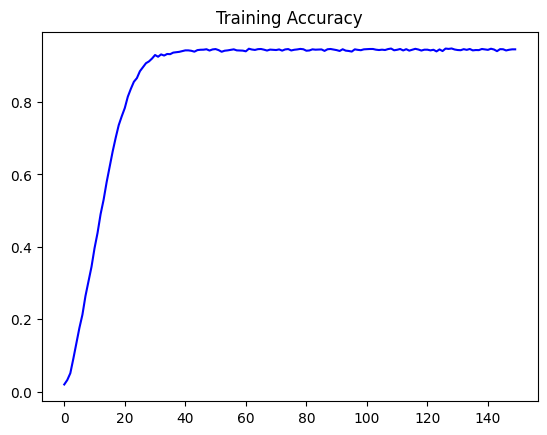

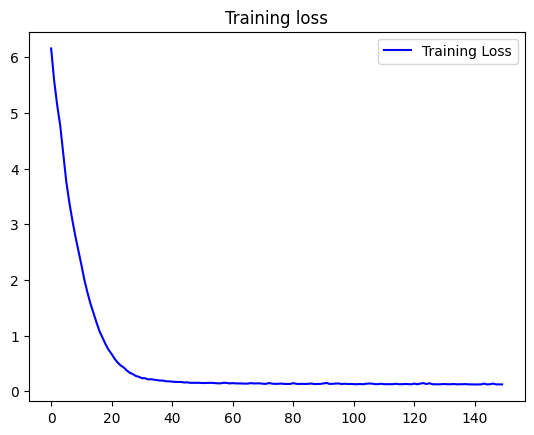

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy')
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
seed_text = "gel"
next_words = 60

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted_probs, axis=-1)

    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)


gel hakkını helâl eyle pembelim olmuş kalır geri kalır hesabı sokakta sen solmuş gurbette bal sultan sultan sultan bana bana ile al bez için ağa bir defteri kitabı kolunu kolunu kolunu alır kalır iller gurbetten gülpembe tüfekler tüfekler hesabı metrelik yine inanamadık büyükler büyükler inanamadık kılıçlar hesabı hesabı varmış tez bu çağırır denir mi mi günaydın gitar dostum elleri̇mi̇ kanadın yazsan
